#### Primero importamos las librerias necesarias

In [1]:
# Para convertirlo en un df
import pandas as pd
# Para cálculos numericos
import numpy as np
# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
# Para normalizar los datos
from sklearn.preprocessing import MinMaxScaler

## ***1.- Recopilación de Datos***

In [2]:
df = pd.read_csv('datasets/titanik_train.csv', index_col=0)

In [3]:
# por si acaso creamos una copia del df
df_copy = df.copy()

## **2.- Exploración y Análisis de Datos**

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Según donde saque este dataset, survived representa con un 1 si sobrevivieron y 0 si no

In [5]:
#vemos algunas metricas como la mediana, minimo, maximo etc..
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.shape

(891, 11)

In [8]:
# miramos las primeras 5 filas de nuestro df
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Vamos a visualizar un poco nuestros datos

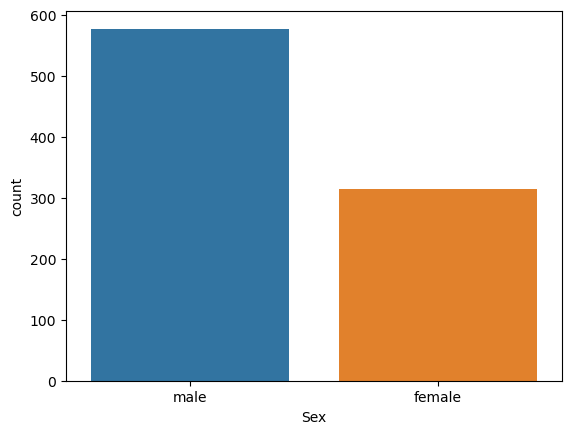

In [9]:
sns.countplot(x='Sex', data=df)
plt.show()

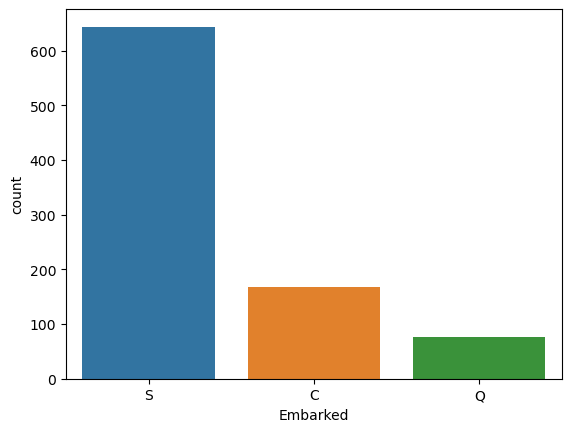

In [10]:
sns.countplot(x='Embarked', data=df)
plt.show()

#### Nos conviene estratificar tambien la columna embarked, ya que esta un poco desigual

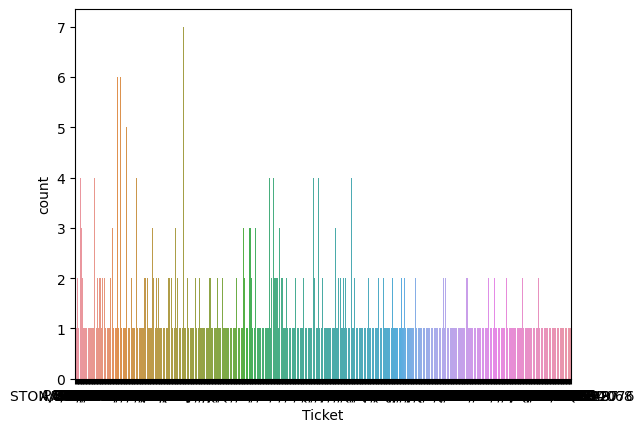

In [11]:
sns.countplot(x='Ticket', data=df)
plt.show()

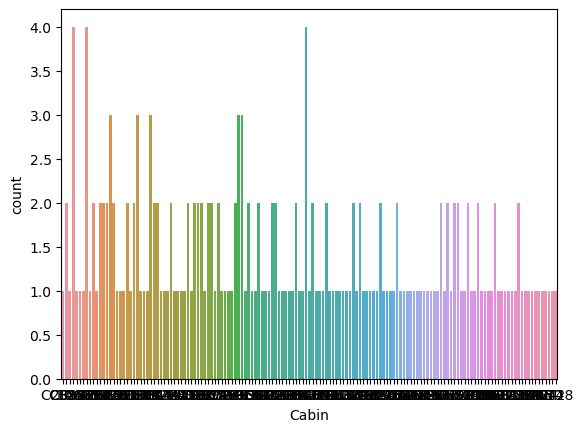

In [12]:
sns.countplot(x='Cabin', data=df)
plt.show()

#### Como vemos hay un monton de caracteristicas en el ticket y en cabin, nos convendria eliminarlos para hacer nuesto modelo mas sencillo

In [13]:
# Eliminamos ticket
columna_a_eliminar = 'Ticket'
df = df.drop(columna_a_eliminar, axis=1)

# Eliminamos Cabin
columna_a_eliminar = 'Cabin'
df = df.drop(columna_a_eliminar, axis=1)

# de paso eliminamos la columna name tambien ya que no parece muy relevante
columna_a_eliminar = 'Name'
df = df.drop(columna_a_eliminar, axis=1)

## 3.- División de Datos

#### Hay que dividir los datos en entrenamiento, evaluación y prueba

In [14]:
# importamos train_test_split para dividir los datos
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(df, test_size=0.1, random_state=42)

In [15]:
print(f'la longitud de train_set es de: {len(train_set)}')
print(f'la longitud de val_set es de: {len(val_set)}')

la longitud de train_set es de: 801
la longitud de val_set es de: 90


#### Ahora separamos las etiquetas (salidas 'y'), de las caracteristicas (entradas 'x')

In [16]:
# separamos el de entrenamiento 
x_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived'].copy()

In [17]:
# Ahora los de validación
x_val = val_set.drop('Survived', axis=1)
y_val = val_set['Survived'].copy()

## 4.- Preprocesamiento de datos

#### Antes de entrenar al módelo, hay que preparar los datos, como imputar, normalizar o estandarizar y codificar


In [18]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
166,3,male,9.0,0,2,20.5250,S
542,3,female,9.0,4,2,31.2750,S
626,1,male,61.0,0,0,32.3208,S
389,3,male,NaN,0,0,7.7292,Q
77,3,male,NaN,0,0,7.8958,S


##### Los NaN son los valores nulos que hay que eliminar

In [19]:
columns_with_nulls = x_train.columns[x_train.isnull().any()]
print(columns_with_nulls)

Index(['Age', 'Embarked'], dtype='object')


#### Estas son las columnas con valores nulos

### 4.1.- Imputar

In [20]:
#para imputar los datos importamos simpleimputer
from sklearn.impute import SimpleImputer

# seleccionamos las columnas numericas
numeric_columns = x_train.select_dtypes(include=['number']).columns

# seleccionamos las categorias
cat_columns = x_train.select_dtypes(include=['object']).columns

# Imputamos valores numéricos con la mediana
numeric_imputer = SimpleImputer(strategy='median')# instanciamos ese imputador numerico
x_train[numeric_columns] = numeric_imputer.fit_transform(x_train[numeric_columns])

# Imputamos las categorias con el valor mas frecuente
imputer_categorical = SimpleImputer(strategy='most_frequent')# instanciamos ese imputador categorico
x_train[cat_columns] = imputer_categorical.fit_transform(x_train[cat_columns])


In [21]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
166,3.0,male,9.0,0.0,2.0,20.5250,S
542,3.0,female,9.0,4.0,2.0,31.2750,S
626,1.0,male,61.0,0.0,0.0,32.3208,S
389,3.0,male,28.0,0.0,0.0,7.7292,Q
77,3.0,male,28.0,0.0,0.0,7.8958,S


#### Los valores nulos se han eliminado, en cambio esta la media y la categoria mas frecuente

In [22]:
columns_with_nulls = x_train.columns[x_train.isnull().any()]
print(columns_with_nulls)

Index([], dtype='object')


In [23]:
x_train.shape

(801, 7)

### 4.2.- Normalizar

#### Ahora vamos a normalizar los datos, es decir, vamos a hacer que los valores no tengan mucha diferencia entre si, sino que tengan una escala entre 0 y 1

In [24]:
# lo haremos con minmaxscaler

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos solo las columnas numéricas para la normalización
numeric_cols = x_train.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

# Ahora, el df contiene las columnas numéricas normalizadas
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
166,1.0,male,0.107816,0.0,0.333333,0.040062,S
542,1.0,female,0.107816,0.5,0.333333,0.061045,S
626,0.0,male,0.761247,0.0,0.000000,0.063086,S
389,1.0,male,0.346569,0.0,0.000000,0.015086,Q
77,1.0,male,0.346569,0.0,0.000000,0.015412,S


### 4.3.- Codificar

#### El ultimo paso seria codificarlo, es decir, convertir las categorias (letras), en números

In [25]:
# Seleccionar columnas categóricas
cat_columns1 = x_train.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding al conjunto de entrenamiento
x_train = pd.get_dummies(x_train, columns=cat_columns1, dtype=float)

In [26]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
166,1.0,0.107816,0.0,0.333333,0.040062,0.0,1.0,0.0,0.0,1.0
542,1.0,0.107816,0.5,0.333333,0.061045,1.0,0.0,0.0,0.0,1.0
626,0.0,0.761247,0.0,0.000000,0.063086,0.0,1.0,0.0,0.0,1.0
389,1.0,0.346569,0.0,0.000000,0.015086,0.0,1.0,0.0,1.0,0.0
77,1.0,0.346569,0.0,0.000000,0.015412,0.0,1.0,0.0,0.0,1.0


In [27]:
x_train.shape

(801, 10)

#### ok, x_train ya esta, ahora hay que hacer lo mismo con x_val

In [28]:
x_val.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
710,3,male,NaN,1,1,15.2458,C
440,2,male,31.0,0,0,10.5000,S
841,3,male,20.0,0,0,7.9250,S
721,2,female,6.0,0,1,33.0000,S
40,3,female,14.0,1,0,11.2417,C


#### Lo se, es un coñaso empezar de nuevo, pues por eso estan los pipelines que lo aprenderemos en otro momento

In [29]:
#para imputar los datos importamos simpleimputer
from sklearn.impute import SimpleImputer

# seleccionamos las columnas numericas
numeric_columns = x_val.select_dtypes(include=['number']).columns

# seleccionamos las categorias
cat_columns = x_val.select_dtypes(include=['object']).columns

# Imputamos valores numéricos con la mediana
numeric_imputer = SimpleImputer(strategy='median')# instanciamos ese imputador numerico
x_val[numeric_columns] = numeric_imputer.fit_transform(x_val[numeric_columns])

# Imputamos las categorias con el valor mas frecuente
imputer_categorical = SimpleImputer(strategy='most_frequent')# instanciamos ese imputador categorico
x_val[cat_columns] = imputer_categorical.fit_transform(x_val[cat_columns])

In [30]:
x_val.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
710,3.0,male,28.0,1.0,1.0,15.2458,C
440,2.0,male,31.0,0.0,0.0,10.5000,S
841,3.0,male,20.0,0.0,0.0,7.9250,S
721,2.0,female,6.0,0.0,1.0,33.0000,S
40,3.0,female,14.0,1.0,0.0,11.2417,C


In [31]:
# lo haremos con minmaxscaler

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionamos solo las columnas numéricas para la normalización
numeric_cols = x_val.select_dtypes(include='number').columns

# Normalizar las columnas numéricas
x_val[numeric_cols] = scaler.fit_transform(x_val[numeric_cols])

# Ahora, el df contiene las columnas numéricas normalizadas

In [32]:
x_val.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
710,1.0,male,0.358209,0.25,0.25,0.058107,C
440,0.5,male,0.402985,0.00,0.00,0.040019,S
841,1.0,male,0.238806,0.00,0.00,0.030205,S
721,0.5,female,0.029851,0.00,0.25,0.125774,S
40,1.0,female,0.149254,0.25,0.00,0.042846,C


In [33]:
# Seleccionar columnas categóricas
cat_columns1 = x_val.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding al conjunto de entrenamiento
x_val = pd.get_dummies(x_val, columns=cat_columns1, dtype=float)

In [34]:
x_val.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
710,1.0,0.358209,0.25,0.25,0.058107,0.0,1.0,1.0,0.0,0.0
440,0.5,0.402985,0.00,0.00,0.040019,0.0,1.0,0.0,0.0,1.0
841,1.0,0.238806,0.00,0.00,0.030205,0.0,1.0,0.0,0.0,1.0
721,0.5,0.029851,0.00,0.25,0.125774,1.0,0.0,0.0,0.0,1.0
40,1.0,0.149254,0.25,0.00,0.042846,1.0,0.0,1.0,0.0,0.0


In [35]:
y_train.isnull().any()

False

## 5.- Entrenamiento

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

##### Ya tenemos el modelo 🎉
##### Ahora solo nos toca predecir nuevos valores y ver quetal se comporta este modelo

In [37]:
y_val_predic = model.predict(x_val)

# Estas son las 5 primeras predicciones de mi modelo para los datos x_val
y_val_predic[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

## 6.- Evaluación

###  Matriz de confusión

##### Aqui se ve que 46 ejemplos han dado 0 (no sobrevivio) asertados y 8 no
##### Y que 29 ha dado 1 (sobrevivio) asertados y 1 ha dado 29 (no sobrevivio)

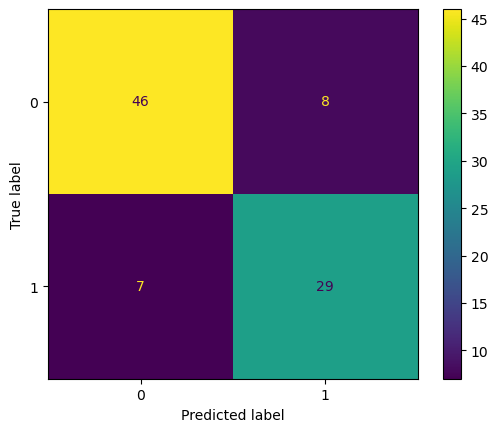

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_predic, labels=model.classes_)

# Crear una visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Mostrar la visualización
disp.plot()
plt.show()


#### Metricas derivadas de la matriz de confusión

### Precisión

In [39]:
from sklearn.metrics import precision_score
print('Precisión:', precision_score(y_val, y_val_predic, pos_label=0))

Precisión: 0.8679245283018868


#### aqui vemos que el 0,7% ha acertado los 0 (no sobrevivio)

In [40]:
from sklearn.metrics import precision_score
print('Precisión:', precision_score(y_val, y_val_predic, pos_label=1))

Precisión: 0.7837837837837838


##### Y un 86% ha acertado con el 1 (sobrevivio)

### Recall

In [41]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_val, y_val_predic, pos_label=1))

Recall: 0.8055555555555556


### F1 score

In [42]:
from sklearn.metrics import f1_score
print('f1_score: ', f1_score(y_val, y_val_predic, pos_label=1))

f1_score:  0.7945205479452055


### Curva de ROC y PR

#### Curva de ROC

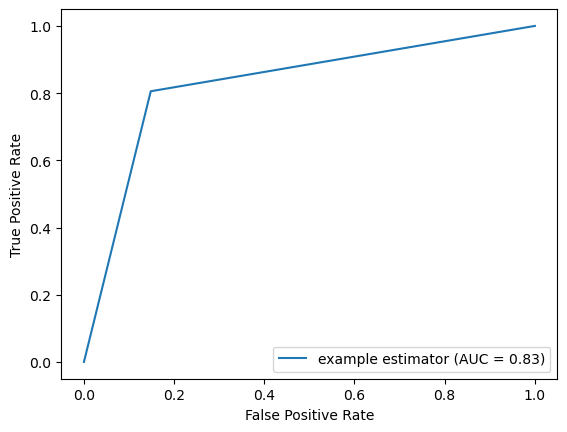

In [43]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_predic)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()